# English Gigaword Corpus - EDA

In [43]:
from IPython.core.display import Markdown, display
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams  
from collections import Counter
from wordcloud import WordCloud
import itertools
import matplotlib.pyplot as plt
import string
import re

tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
translator = str.maketrans('', '', string.punctuation)
stop_words = set(stopwords.words('english'))

def printmd(string):
    display(Markdown(string))

%matplotlib inline

### Data load, Preprocessing, Basic details

In [5]:
def clean_doc(doc):
    words_only = tokenizer.tokenize(doc.strip())
    no_punctuation = [word.translate(translator) for word in words_only]
    lower_cased = [word.lower() for word in no_punctuation]
    
    return ' '.join(lower_cased)

In [6]:
def read_corpus(filename):
    with open(filename) as fp:
        docs = fp.readlines()

    tokens = []
    for idx in range(len(docs)):
        docs[idx] = clean_doc(docs[idx])
        if idx < 5:
            print(docs[idx] + '\n')
        tokens.extend(docs[idx].split())

    dictionary = set(tokens)

    print(f'number of documents: {len(docs)}')
    print(f'number of tokens: {len(tokens)}')
    print(f'dictionary size: {len(dictionary)}')
    print(f'lexical diversity of the corpus: {round(len(dictionary)/len(tokens), 3)}')
    
    return docs, tokens, dictionary


def merge_and_report_dictionaries(*dictionaries):
    merged = set(list(itertools.chain.from_iterable([[
        k for k in d
    ] for d in dictionaries])))
    print(f'merged dictionary size: {len(merged)}')
    return merged

In [7]:
train_docs, train_tokens, train_dictionary = read_corpus('./data/train.article.txt')

australia s current account deficit shrunk by a record  billion dollars lrb  billion us rrb in the june quarter due to soaring commodity prices  figures released monday showed 

at least two people were killed in a suspected bomb attack on a passenger bus in the strife torn southern philippines on monday  the military said 

australian shares closed down  percent monday following a weak lead from the united states and lower commodity prices  dealers said 

south korea s nuclear envoy kim sook urged north korea monday to restart work to disable its nuclear plants and stop its  typical  brinkmanship in negotiations 

south korea on monday announced sweeping tax reforms  including income and corporate tax cuts to boost growth by stimulating sluggish private consumption and business investment 

number of documents: 3803957
number of tokens: 110382986
dictionary size: 99759
lexical diversity of the corpus: 0.001


In [9]:
val_docs, val_tokens, val_dictionary = read_corpus('./data/valid.article.txt')

five time world champion michelle kwan withdrew from the  us figure skating championships on wednesday  but will petition us skating officials for the chance to compete at the  turin olympics 

us business leaders lashed out wednesday at legislation that would penalize companies for employing illegal immigrants 

general motors corp  said wednesday its us sales fell  percent in december and four percent in  with the biggest losses coming from passenger car sales 

several thousand people gathered on wednesday evening on the main square in zagreb for a public draw and an open air party to celebrate the croatian capital s second chance to host the women s slalom world cup 

us first lady laura bush and us secretary of state condoleezza rice will represent the united states later this month at the inauguration of liberia s president elect ellen johnson sirleaf  the white house said wednesday 

number of documents: 189651
number of tokens: 5490454
dictionary size: 59457
lexical diversity o

### Word cloud, Common words

In [27]:
def word_analysis(tokens):
    frequency_dict = Counter(tokens)
    most_common = frequency_dict.most_common(200)
    most_common = [entry for entry in most_common if (entry[0] not in stop_words)]
    wc = WordCloud(background_color='white', width=600, height=400)
    wc.generate_from_frequencies(dict(most_common))
    
    most_common = dict(list(most_common[:20]))
    
    fig, axes = plt.subplots(1, 2, figsize=(26, 12))
    axes[0].imshow(wc)
    axes[0].axis('off')
    axes[1].bar(most_common.keys(), most_common.values())
    plt.xticks(rotation=90)

training data words analysis


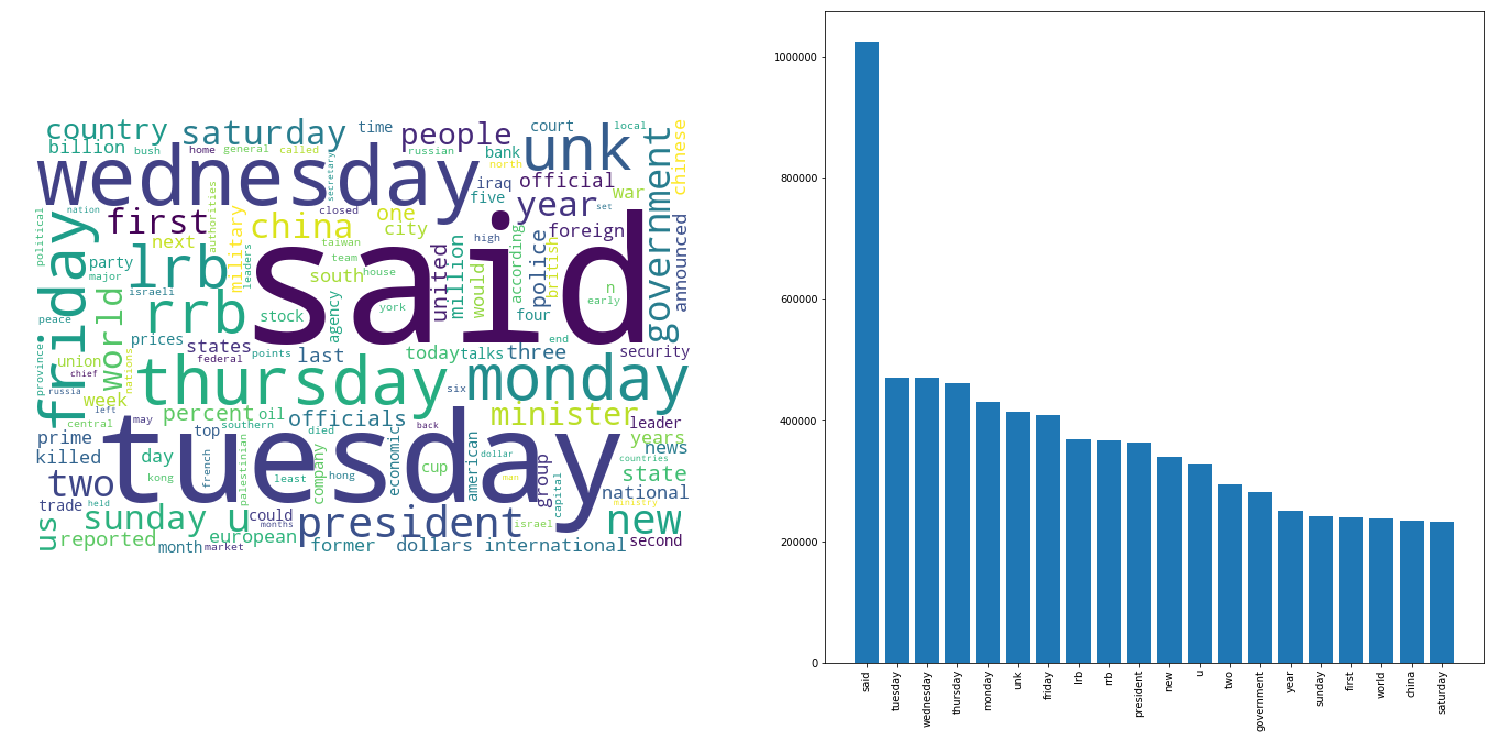

In [30]:
print('training data words analysis')
word_analysis(train_tokens)

validation data words analysis


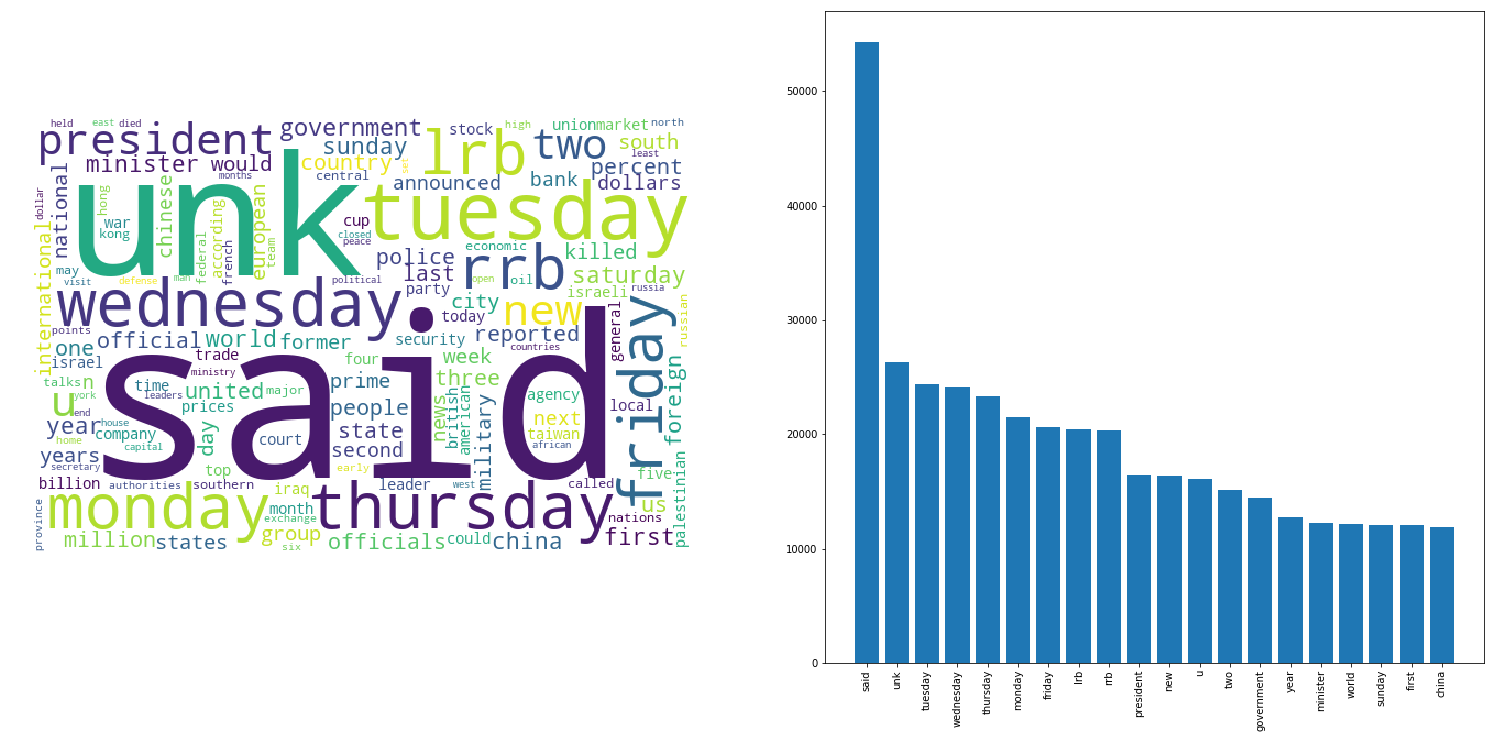

In [29]:
print('validation data words analysis')
word_analysis(val_tokens)

### Bigrams, Trigrams, Collocations

In [38]:
def ngram_analysis(docs):
    bigram_dist = FreqDist()
    trigram_dist = FreqDist()
    
    for doc in docs:
        bigrams = ngrams(doc.split(), 2)
        trigrams = ngrams(doc.split(), 3)
        
        bigram_dist.update(bigrams)
        trigram_dist.update(trigrams)
        
    bigram_dist.plot(25)
    trigram_dist.plot(15)

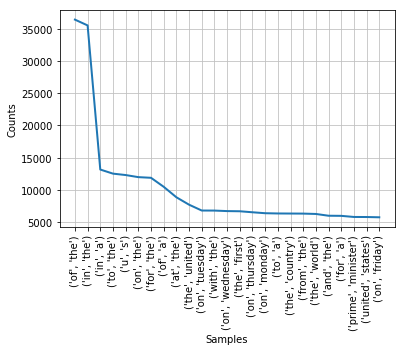

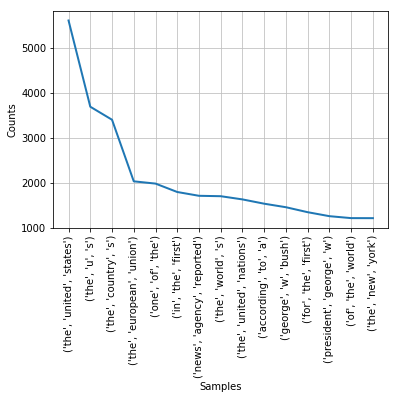

In [39]:
ngram_analysis(train_docs)
ngram_analysis(val_docs)

### Split into model input, model output

In [68]:
def prepare_X_y(docs, slice_factor=4):
    model_inputs, model_outputs = [], []
    
    for idx in range(len(docs)):
        tokens = docs[idx].split()
        _input = ' '.join(tokens[:(len(tokens) - slice_factor)])
        _output = ' '.join(tokens[(len(tokens) - slice_factor):])
        if idx < 3: 
            printmd('**input:** ' + _input + (' ____\t' * slice_factor))
            printmd('**expected output:** ' + _output)
            printmd('\n ----- \n')
        model_inputs.append(_input)
        model_outputs.append(_output)
        
    return model_inputs, model_outputs

In [69]:
val_inputs, val_outputs = prepare_X_y(val_docs)

**input:** five time world champion michelle kwan withdrew from the us figure skating championships on wednesday but will petition us skating officials for the chance to compete ____	 ____	 ____	 ____	

**expected output:** at the turin olympics


 ----- 


**input:** us business leaders lashed out wednesday at legislation that would penalize companies ____	 ____	 ____	 ____	

**expected output:** for employing illegal immigrants


 ----- 


**input:** general motors corp said wednesday its us sales fell percent in december and four percent in with the biggest losses coming ____	 ____	 ____	 ____	

**expected output:** from passenger car sales


 ----- 


# EDA for WikiText

## Read Corpus

In [10]:
wt_train_docs, wt_train_tokens, wt_train_dictionary = read_corpus('./Baseline_edu/dataset/train.txt')



 valkyria chronicles iii 



senjō no valkyria 3  unk chronicles  japanese  戦場のヴァルキュリア3  lit  valkyria of the battlefield 3   commonly referred to as valkyria chronicles iii outside japan  is a tactical role  playing video game developed by sega and media vision for the playstation portable  released in january 2011 in japan  it is the third game in the valkyria series  unk the same fusion of tactical and real  time gameplay as its predecessors  the story runs parallel to the first game and follows the  nameless   a penal military unit serving the nation of gallia during the second europan war who perform secret black operations and are pitted against the imperial unit  unk raven  

the game began development in 2010  carrying over a large portion of the work done on valkyria chronicles ii  while it retained the standard features of the series  it also underwent multiple adjustments  such as making the game more unk for series newcomers  character designer unk honjou and composer hit

In [12]:
wt_valid_docs, wt_valid_tokens, wt_valid_dictionary = read_corpus('./Baseline_edu/dataset/valid.txt')



 homarus gammarus 



homarus gammarus  known as the european lobster or common lobster  is a species of unk lobster from the eastern atlantic ocean  mediterranean sea and parts of the black sea  it is closely related to the american lobster  h  americanus  it may grow to a length of 60 cm  24 in  and a mass of 6 kilograms  13 lb   and bears a conspicuous pair of claws  in life  the lobsters are blue  only becoming  lobster red  on cooking  mating occurs in the summer  producing eggs which are carried by the females for up to a year before hatching into unk larvae  homarus gammarus is a highly esteemed food  and is widely caught using lobster pots  mostly around the british isles 



number of documents: 3760
number of tokens: 184354
dictionary size: 11976
lexical diversity of the corpus: 0.065


In [23]:
wt_test_docs, wt_test_tokens, wt_test_dictionary = read_corpus('./Baseline_edu/dataset/test.txt')



 robert unk 



robert unk is an english film  television and theatre actor  he had a guest  starring role on the television series the bill in 2000  this was followed by a starring role in the play herons written by simon stephens  which was performed in 2001 at the royal court theatre  he had a guest role in the television series judge john unk in 2002  in 2004 unk landed a role as  craig  in the episode  teddy s story  of the television series the long firm  he starred alongside actors mark strong and derek jacobi  he was cast in the 2005 theatre productions of the philip ridley play mercury fur  which was performed at the drum theatre in plymouth and the unk unk factory in london  he was directed by john unk and starred alongside ben unk  shane unk  harry kent  fraser unk  sophie stanton and dominic hall 

in 2006  unk starred alongside unk in the play unk written by mark unk  he appeared on a 2006 episode of the television series  doctors  followed by a role in the 2007 theatre 

In [25]:
merge_and_report_dictionaries(wt_train_dictionary, wt_valid_dictionary, wt_test_dictionary)

merged dictionary size: 28755


{'resemble',
 'fungus',
 'uyghur',
 'mcdonough',
 'doofenshmirtz',
 'degrading',
 'starship',
 'exaggeration',
 'mathematicians',
 'adjusted',
 'publicly',
 'lepus',
 'hard',
 'potomac',
 'decrease',
 'canonical',
 'pity',
 'brest',
 '720',
 'biddenden',
 'torah',
 'conquests',
 'encounters',
 'abortive',
 'degenerate',
 'card',
 'institution',
 'quarterly',
 'hundred',
 'rhodes',
 'juno',
 'enterprise',
 'stay',
 'terrence',
 '88',
 'zone',
 'casemate',
 'reprises',
 'elvis',
 'advisory',
 'allusions',
 'sugar',
 'cognitive',
 'surrogate',
 'nudity',
 'kilometers',
 'cyclogenesis',
 'fertilization',
 'luck',
 'submissions',
 'fayette',
 'womanhood',
 'mechanised',
 'collins',
 'mahatma',
 'guttural',
 'hasn',
 'prerogative',
 'advance',
 'popularizing',
 'duller',
 'poesy',
 'assumes',
 'hibbing',
 'marche',
 'lineberger',
 'greene',
 'reformers',
 'enlarged',
 'icelandic',
 'vhf',
 'aransas',
 'terrible',
 'nagar',
 'ignace',
 'assured',
 'mentioned',
 'elves',
 'hilda',
 'serial',
 

training data words analysis


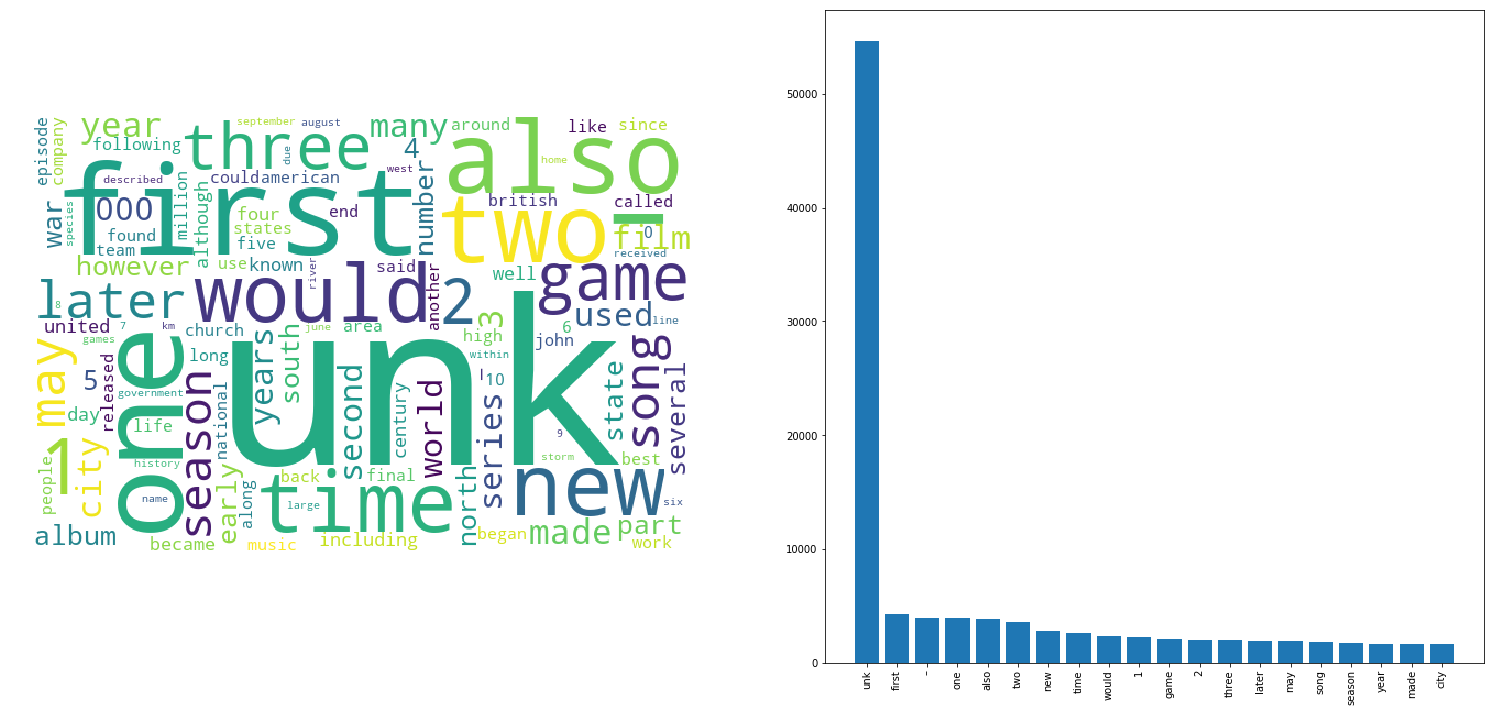

In [14]:
print('training data words analysis')
word_analysis(wt_train_tokens)

validation data words analysis


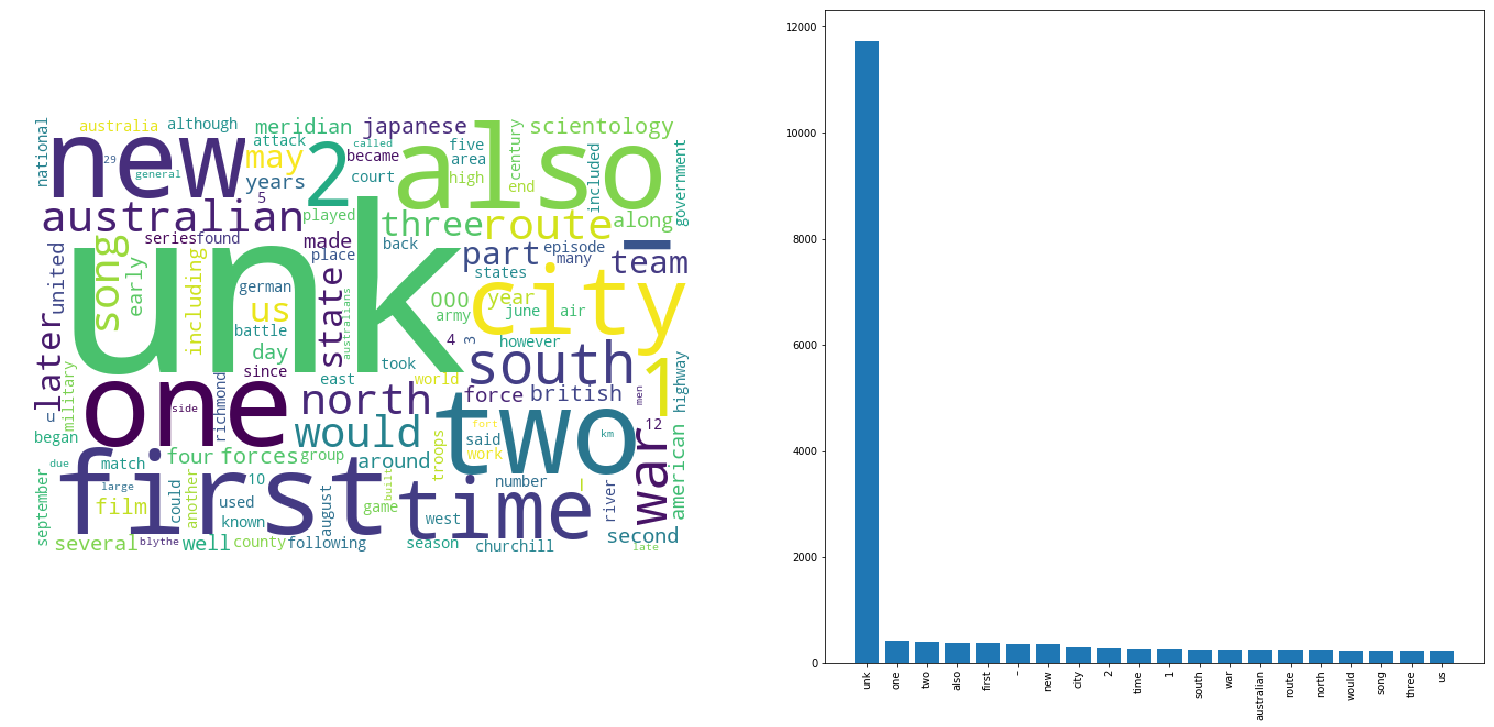

In [16]:
print('validation data words analysis')
word_analysis(wt_valid_tokens)

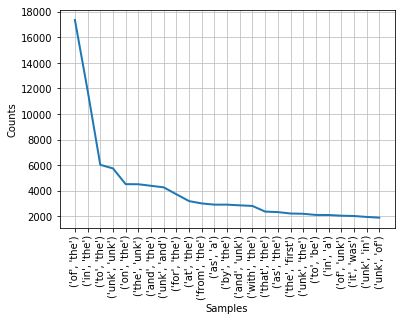

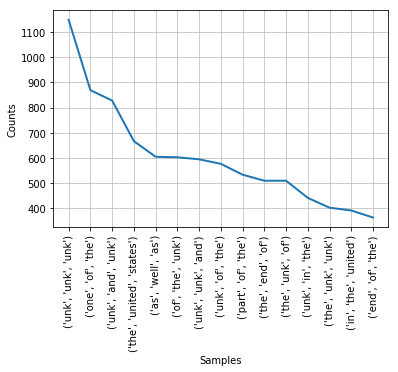

In [20]:
ngram_analysis(wt_train_docs)